<a href="https://colab.research.google.com/github/erassmirza/ML_termProject/blob/main/Classification_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Term Project/CSVs/Bitcoin Historical Data - Investing.com.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 15, 2023","30,297.1","30,316.8","30,395.4","30,246.9",19.40K,-0.07%
1,"Jul 14, 2023","30,317.4","31,465.4","31,602.6","29,944.3",82.42K,-3.65%
2,"Jul 13, 2023","31,466.1","30,387.3","31,764.5","30,260.0",99.81K,3.55%
3,"Jul 12, 2023","30,387.3","30,623.3","30,951.3","30,231.7",54.06K,-0.77%
4,"Jul 11, 2023","30,623.3","30,414.2","30,782.2","30,333.8",39.84K,0.68%
...,...,...,...,...,...,...,...
87,"Apr 19, 2023","28,813.7","30,382.2","30,408.4","28,641.1",111.27K,-5.16%
88,"Apr 18, 2023","30,382.2","29,434.1","30,470.1","29,149.2",76.58K,3.22%
89,"Apr 17, 2023","29,434.9","30,310.8","30,312.2","29,274.0",71.90K,-2.89%
90,"Apr 16, 2023","30,310.3","30,299.2","30,545.3","30,134.6",34.48K,0.04%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      92 non-null     object
 1   Price     92 non-null     object
 2   Open      92 non-null     object
 3   High      92 non-null     object
 4   Low       92 non-null     object
 5   Vol.      92 non-null     object
 6   Change %  92 non-null     object
dtypes: object(7)
memory usage: 5.2+ KB


In [ ]:
df.columns = ['data', 'price', 'open', 'high', 'low', 'volume', 'per_change']
df

,data,price,open,high,low,volume,per_change
0,"Jul 15, 2023","30,297.1","30,316.8","30,395.4","30,246.9",19.40K,-0.07%
1,"Jul 14, 2023","30,317.4","31,465.4","31,602.6","29,944.3",82.42K,-3.65%
2,"Jul 13, 2023","31,466.1","30,387.3","31,764.5","30,260.0",99.81K,3.55%
3,"Jul 12, 2023","30,387.3","30,623.3","30,951.3","30,231.7",54.06K,-0.77%
4,"Jul 11, 2023","30,623.3","30,414.2","30,782.2","30,333.8",39.84K,0.68%
...,...,...,...,...,...,...,...
87,"Apr 19, 2023","28,813.7","30,382.2","30,408.4","28,641.1",111.27K,-5.16%
88,"Apr 18, 2023","30,382.2","29,434.1","30,470.1","29,149.2",76.58K,3.22%
89,"Apr 17, 2023","29,434.9","30,310.8","30,312.2","29,274.0",71.90K,-2.89%
90,"Apr 16, 2023","30,310.3","30,299.2","30,545.3","30,134.6",34.48K,0.04%


In [ ]:
df.data = pd.to_datetime(df['data'])
df.price = df.price.str.replace(',', '').astype('float')
df.open = df.open.str.replace(',', '').astype('float')
df.high = df.high.str.replace(',', '').astype('float')
df.low = df.low.str.replace(',', '').astype('float')
df.volume = df.volume.str.replace('K', '').astype('float') * 1000
df.per_change = df.per_change.str.replace('%', '').astype('float')

In [ ]:
df

,data,price,open,high,low,volume,per_change
0,2023-07-15,30297.1,30316.8,30395.4,30246.9,19400.0,-0.07
1,2023-07-14,30317.4,31465.4,31602.6,29944.3,82420.0,-3.65
2,2023-07-13,31466.1,30387.3,31764.5,30260.0,99810.0,3.55
3,2023-07-12,30387.3,30623.3,30951.3,30231.7,54060.0,-0.77
4,2023-07-11,30623.3,30414.2,30782.2,30333.8,39840.0,0.68
...,...,...,...,...,...,...,...
87,2023-04-19,28813.7,30382.2,30408.4,28641.1,111270.0,-5.16
88,2023-04-18,30382.2,29434.1,30470.1,29149.2,76580.0,3.22
89,2023-04-17,29434.9,30310.8,30312.2,29274.0,71900.0,-2.89
90,2023-04-16,30310.3,30299.2,30545.3,30134.6,34480.0,0.04


In [ ]:
df['high_low'] = df.high - df.low
df['high_previous'] = df.high - df.price.shift(1)
df['low_previous'] = df.low - df.price.shift(1)
df['true_range'] = df[['high_low', 'high_previous', 'low_previous']].max(axis=1)

In [ ]:
df['grade'] = df['true_range'].apply(lambda true_range: "Low" if true_range < df['true_range'].mean() - 275 else "Medium" if true_range <= df['true_range'].mean() + 275 else "High")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,data,price,open,high,low,volume,per_change,high_low,high_previous,low_previous,true_range,grade
1,2023-07-14,30317.4,31465.4,31602.6,29944.3,82420.0,-3.65,1658.3,1305.5,-352.8,1658.3,High
2,2023-07-13,31466.1,30387.3,31764.5,30260.0,99810.0,3.55,1504.5,1447.1,-57.4,1504.5,High
3,2023-07-12,30387.3,30623.3,30951.3,30231.7,54060.0,-0.77,719.6,-514.8,-1234.4,719.6,Medium
4,2023-07-11,30623.3,30414.2,30782.2,30333.8,39840.0,0.68,448.4,394.9,-53.5,448.4,Low
5,2023-07-10,30415.3,30166.9,31019.6,29969.1,55240.0,0.82,1050.5,396.3,-654.2,1050.5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
87,2023-04-19,28813.7,30382.2,30408.4,28641.1,111270.0,-5.16,1767.3,2167.9,400.6,2167.9,High
88,2023-04-18,30382.2,29434.1,30470.1,29149.2,76580.0,3.22,1320.9,1656.4,335.5,1656.4,High
89,2023-04-17,29434.9,30310.8,30312.2,29274.0,71900.0,-2.89,1038.2,-70.0,-1108.2,1038.2,Medium
90,2023-04-16,30310.3,30299.2,30545.3,30134.6,34480.0,0.04,410.7,1110.4,699.7,1110.4,Medium


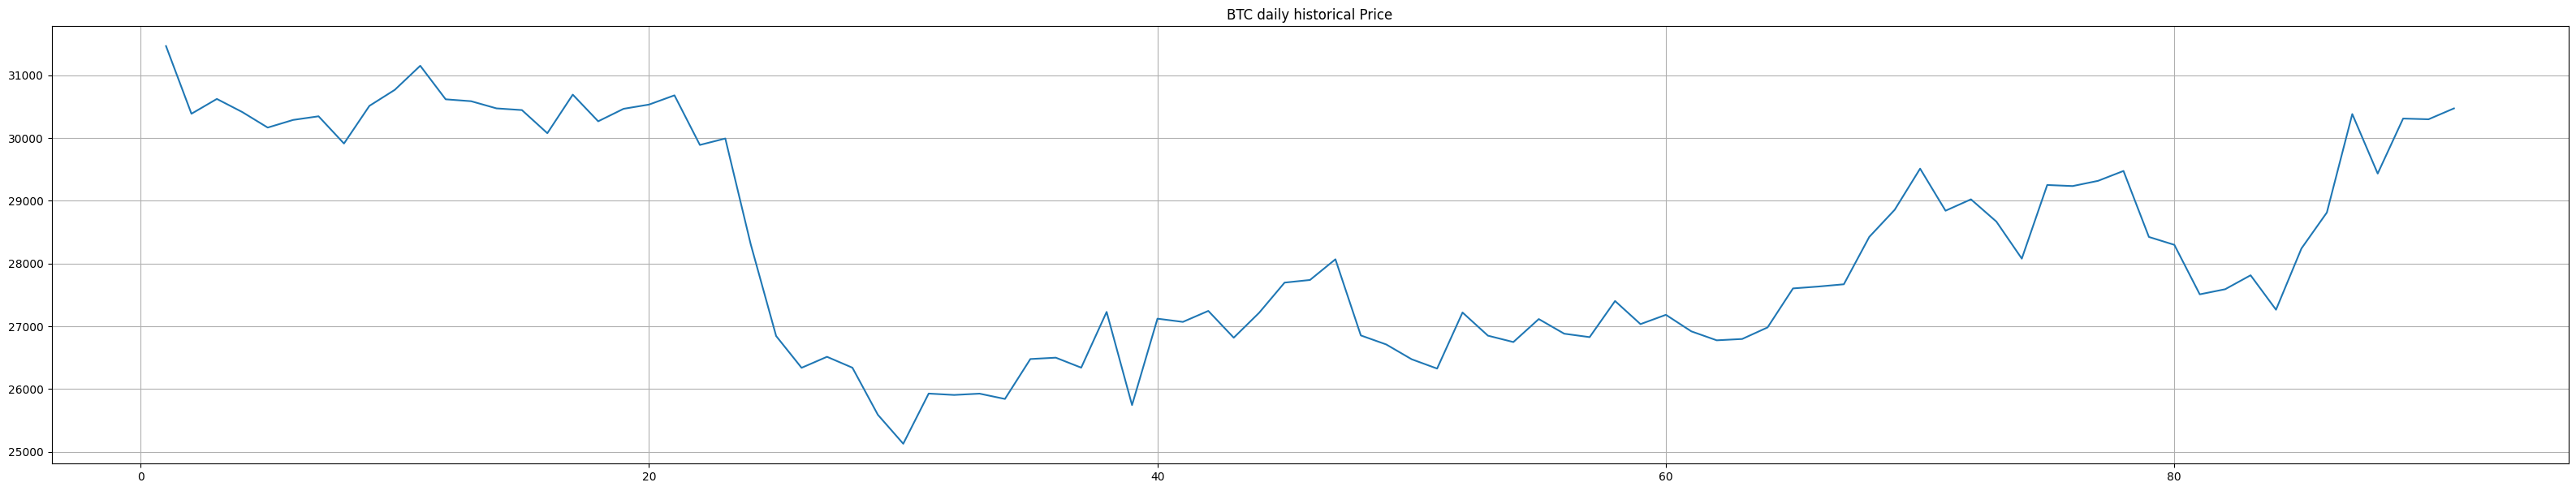

In [ ]:
plt.figure(figsize=(40, 7))
plt.plot(df.open)
plt.title('BTC daily historical Price')
plt.grid(True)
plt.show()

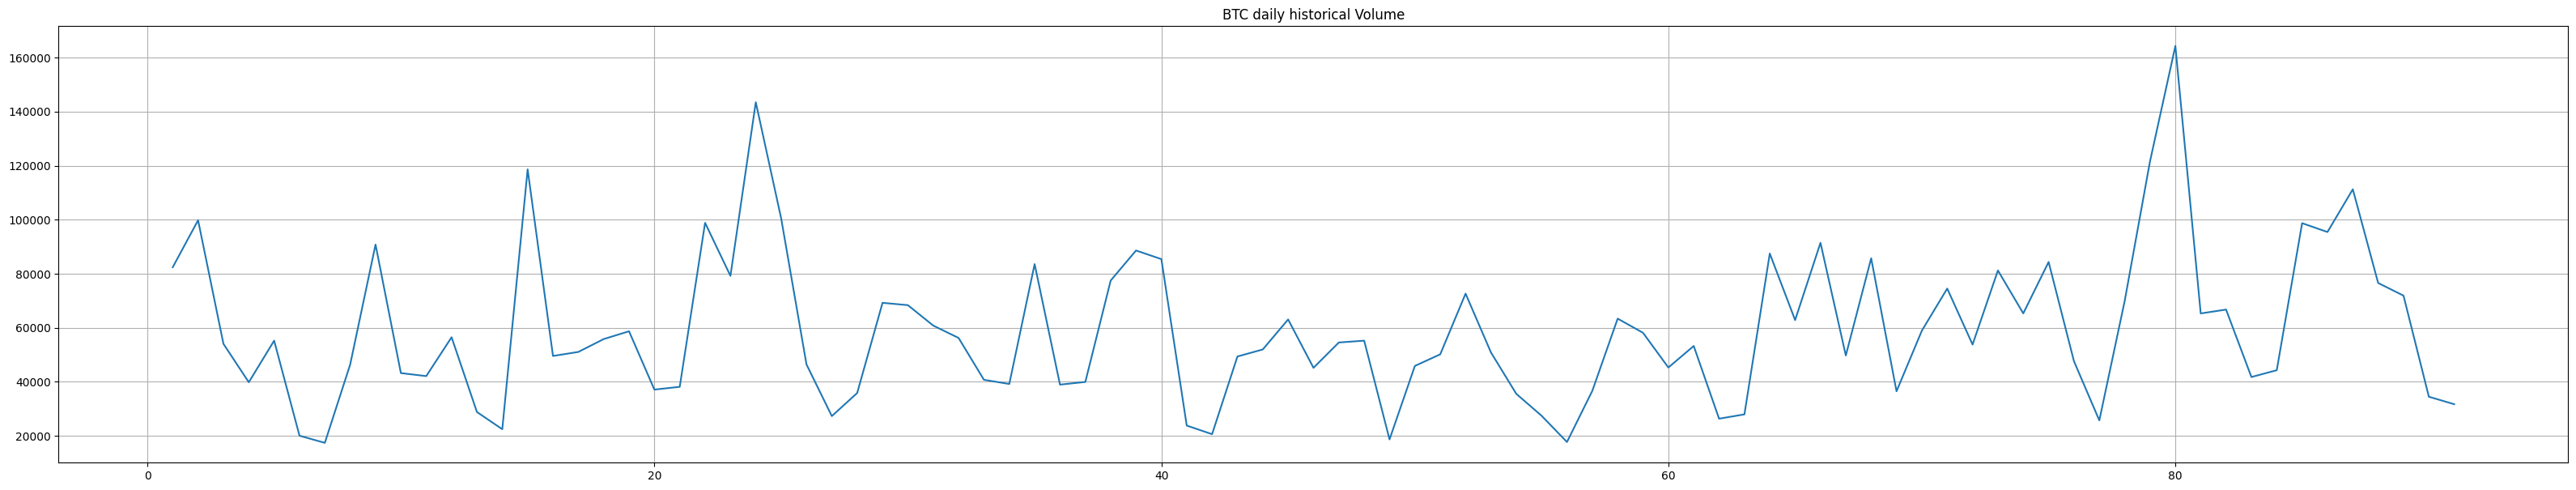

In [ ]:
plt.figure(figsize=(40, 7))
plt.plot(df.volume)
plt.title('BTC daily historical Volume')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def moving_average(series, n):
  return np.average(series[-n:])

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
  rolling_mean = series.rolling(window=window).mean()
  plt.figure(figsize=(40,6))
  plt.title("Moving average\n window size = {}".format(window))
  plt.plot(rolling_mean, "g", label="Rolling mean trend")

  if plot_intervals:
      mae = mean_absolute_error(series[window:], rolling_mean[window:])
      deviation = np.std(series[window:] - rolling_mean[window:])
      lower_bond = rolling_mean - (mae + scale * deviation)
      upper_bond = rolling_mean + (mae + scale * deviation)
      plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
      plt.plot(lower_bond, "r--")

  plt.plot(series[window:], label="Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)

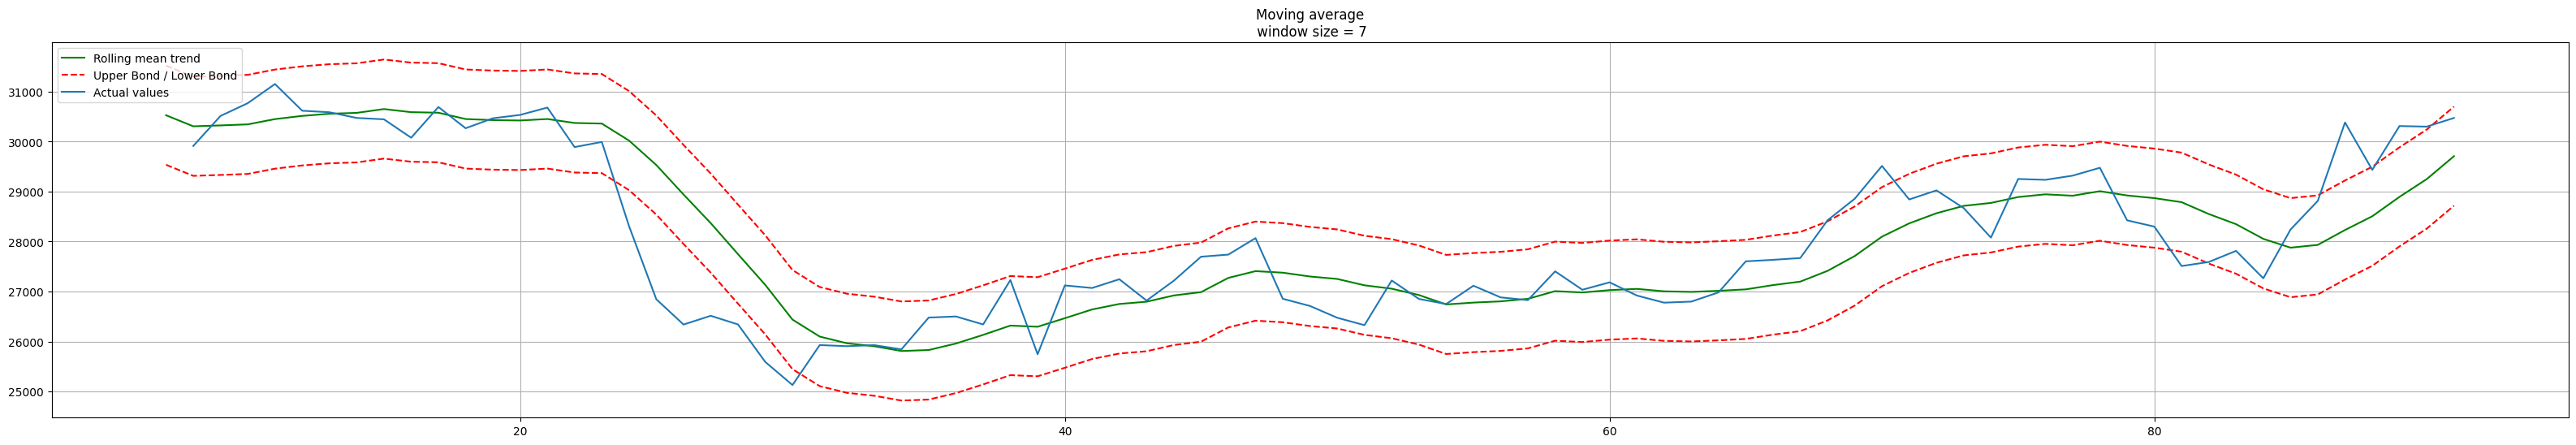

In [ ]:
plotMovingAverage(df['open'], 7, scale= 0.5, plot_intervals=True)

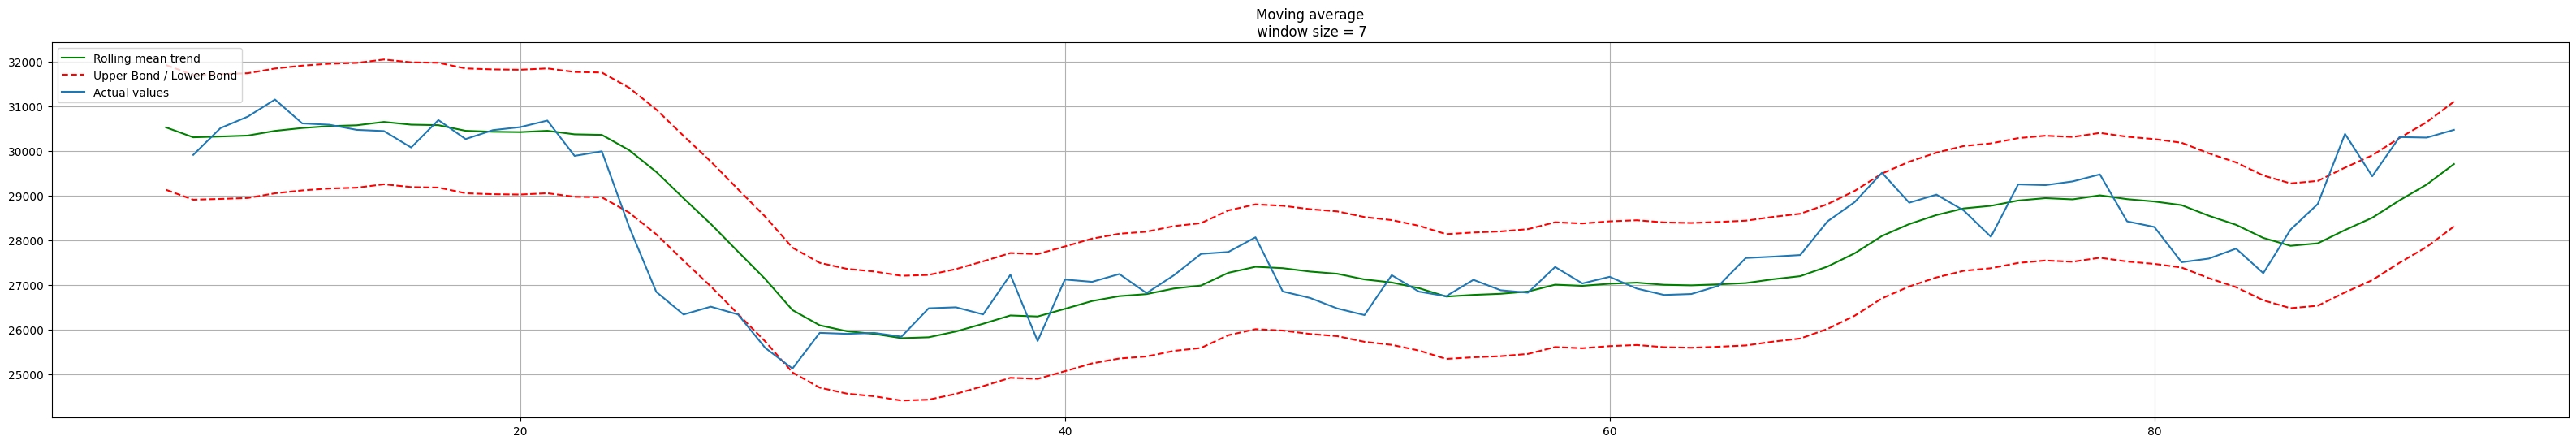

In [ ]:
plotMovingAverage(df['open'], 7, scale= 1, plot_intervals=True)

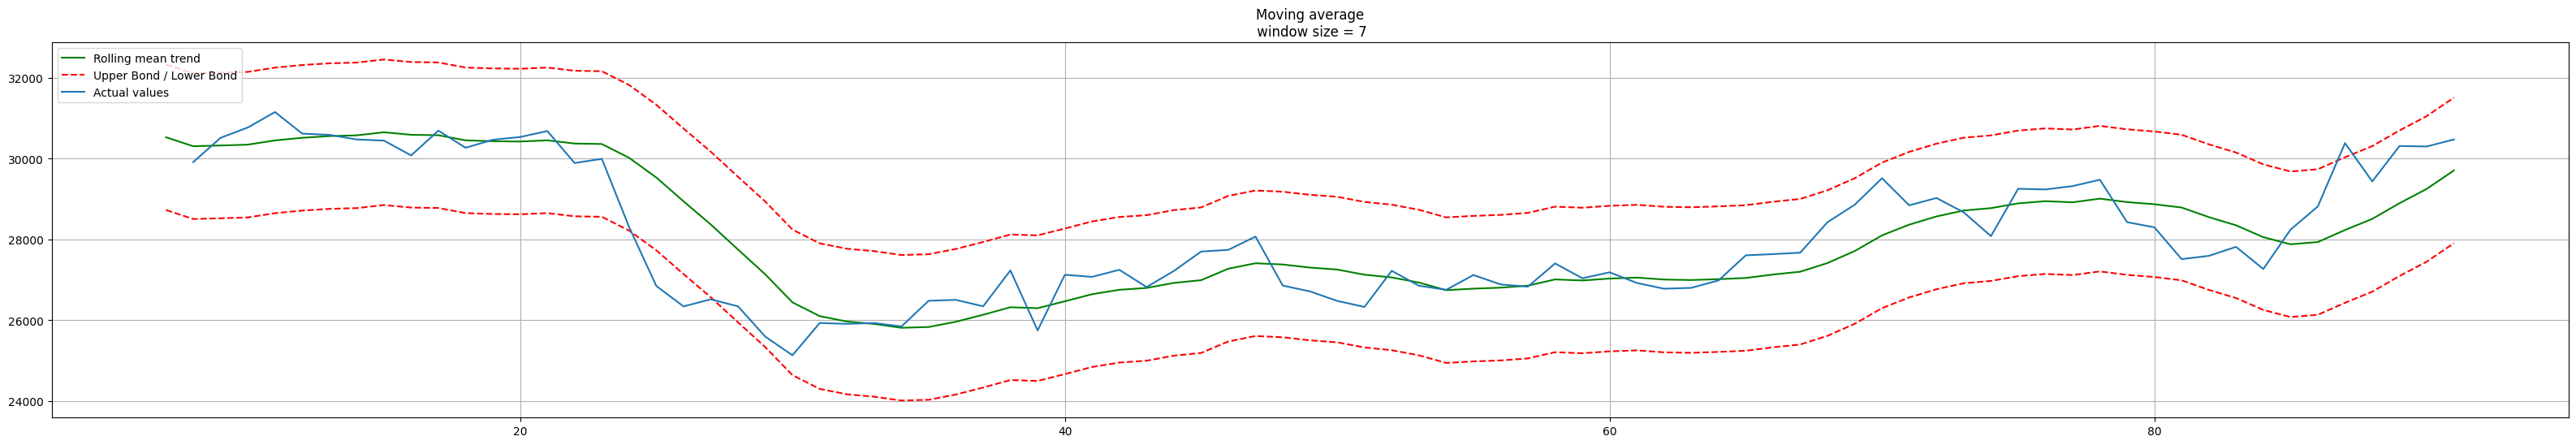

In [ ]:
plotMovingAverage(df['open'], 7, scale= 1.5, plot_intervals=True)

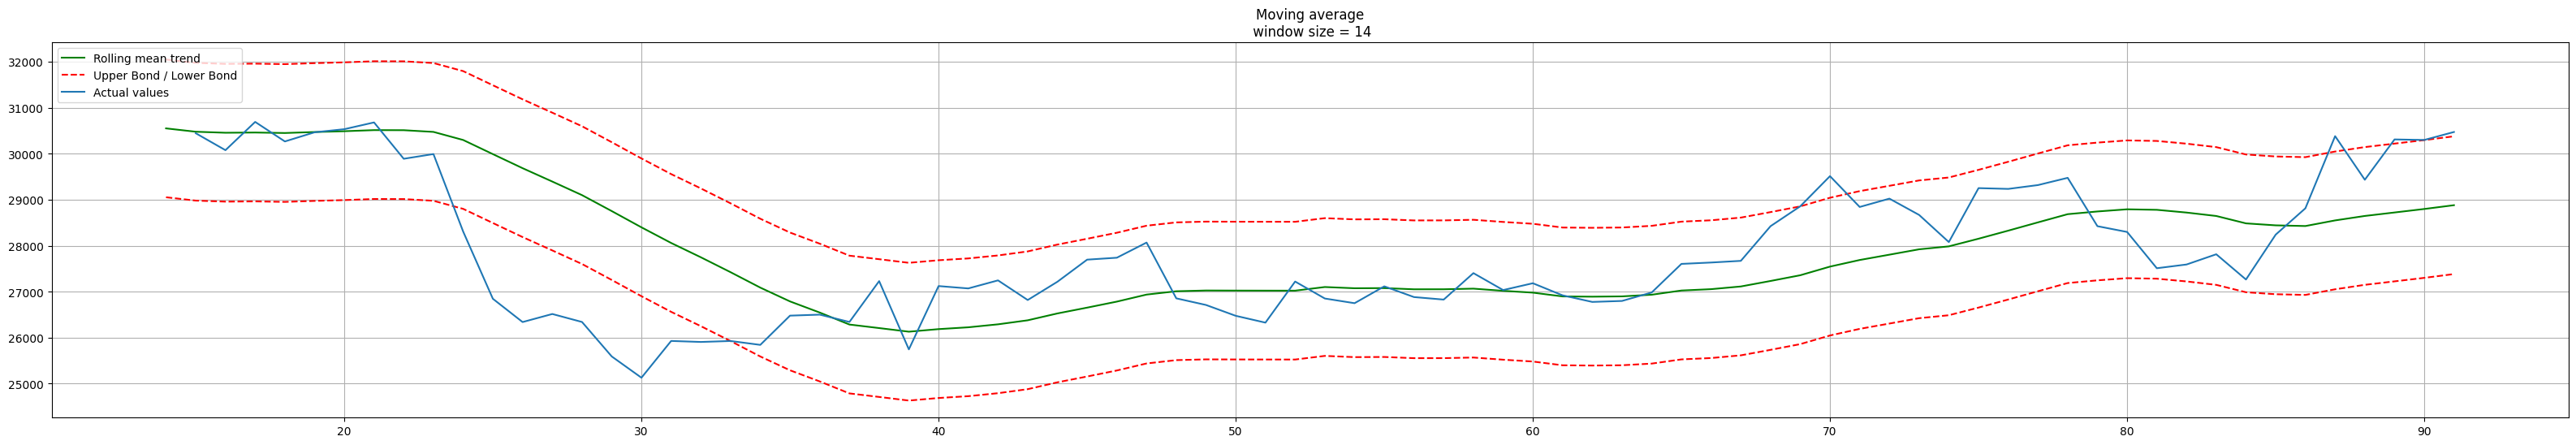

In [ ]:
plotMovingAverage(df['open'], 14, scale= 0.5, plot_intervals=True)

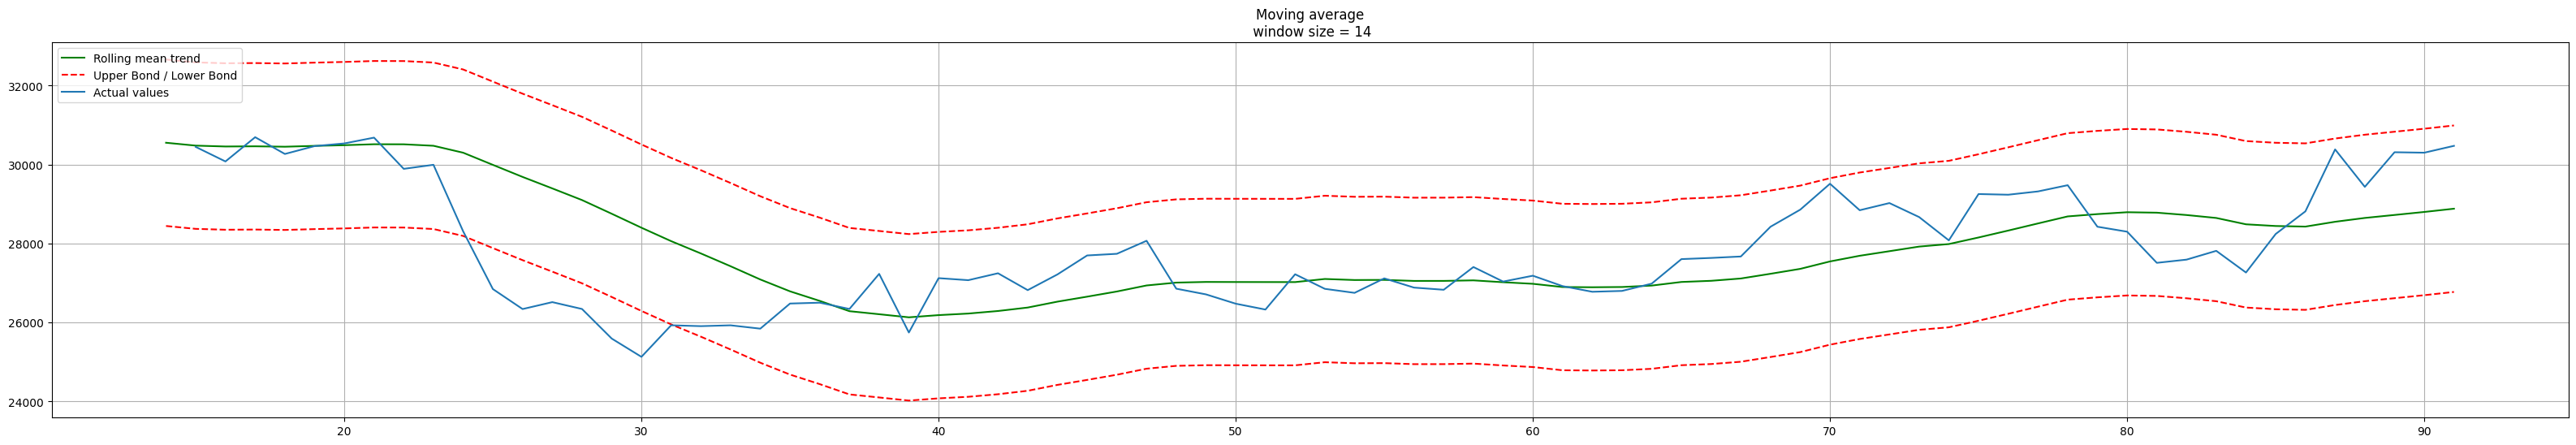

In [ ]:
plotMovingAverage(df['open'], 14, scale= 1, plot_intervals=True)

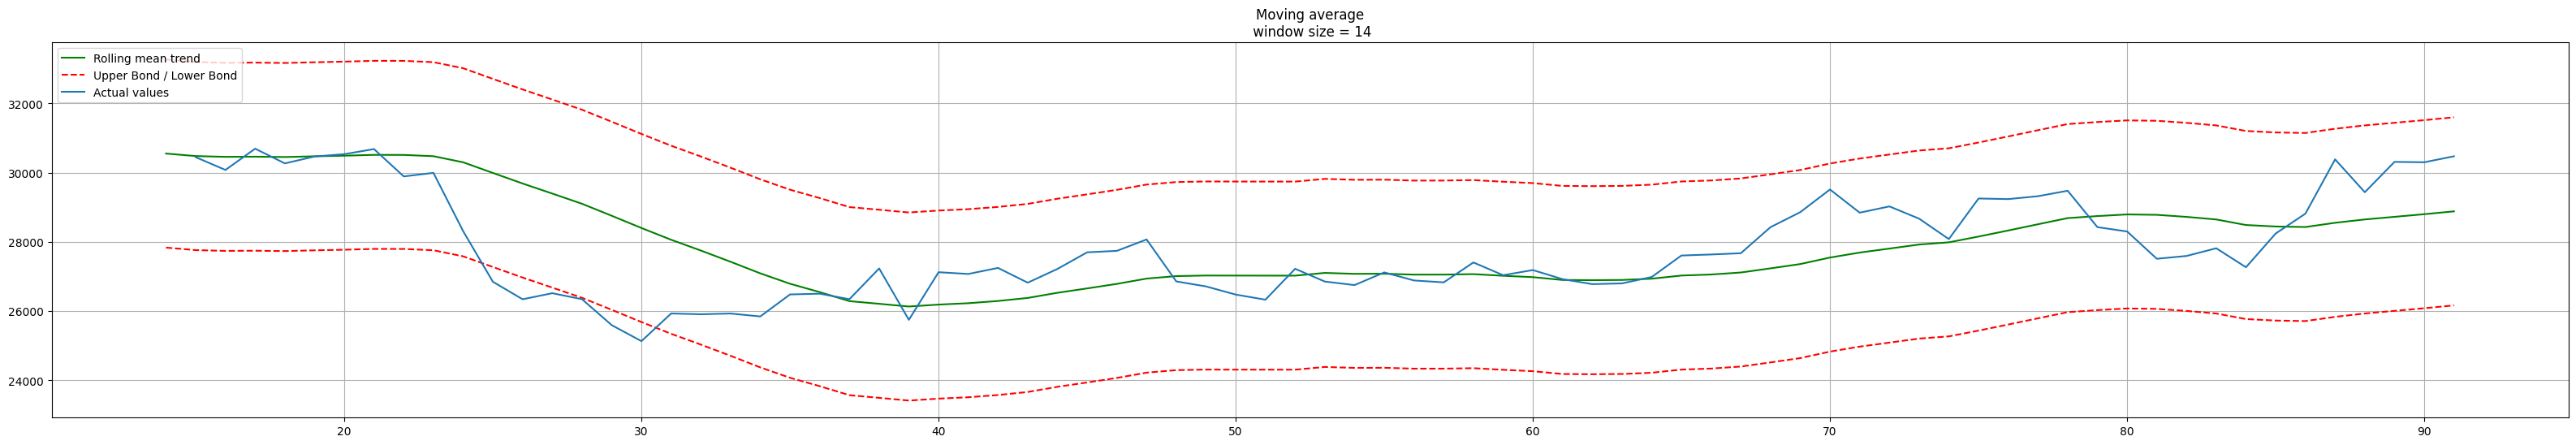

In [ ]:
plotMovingAverage(df['open'], 14, scale= 1.5, plot_intervals=True)

In [ ]:
def weighted_average(series, weights):
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(25, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True)

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

<ipython-input-209-972d2e0cfe62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,price,open,high,low,volume,per_change,high_low,high_previous,low_previous,true_range
price,1.000000,0.935839,0.976439,0.973879,0.109148,0.174799,0.097821,0.179252,0.100312,0.097595
open,0.935839,1.000000,0.964399,0.970403,0.084392,-0.182838,0.066805,0.252534,0.190673,0.079708
high,0.976439,0.964399,1.000000,0.960408,0.231260,0.030434,0.229346,0.263718,0.088207,0.227844
low,0.973879,0.970403,0.960408,1.000000,-0.024518,0.003534,-0.050906,0.190637,0.214367,-0.021541
volume,0.109148,0.084392,0.231260,-0.024518,1.000000,0.072700,0.914669,0.257371,-0.394052,0.816249
per_change,0.174799,-0.182838,0.030434,0.003534,0.072700,1.000000,0.096750,-0.207093,-0.261679,0.060361
high_low,0.097821,0.066805,0.229346,-0.050906,0.914669,0.096750,1.000000,0.279330,-0.432740,0.892026
high_previous,0.179252,0.252534,0.263718,0.190637,0.257371,-0.207093,0.279330,1.000000,0.744757,0.524540
low_previous,0.100312,0.190673,0.088207,0.214367,-0.394052,-0.261679,-0.432740,0.744757,1.000000,-0.127472
true_range,0.097595,0.079708,0.227844,-0.021541,0.816249,0.060361,0.892026,0.524540,-0.127472,1.000000


In [ ]:
# Plotting the distribution chart
def dist_plot(df, col_name, plot=False):
    samples = df[col_name].values
    ax = sns.histplot(samples, bins=30, kde=True, color='skyblue')
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    mode_idx = np.argmax(ys)
    ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
    plt.show()
    print('variance with the most frequent repeat is', xs[mode_idx])
    return xs[mode_idx]

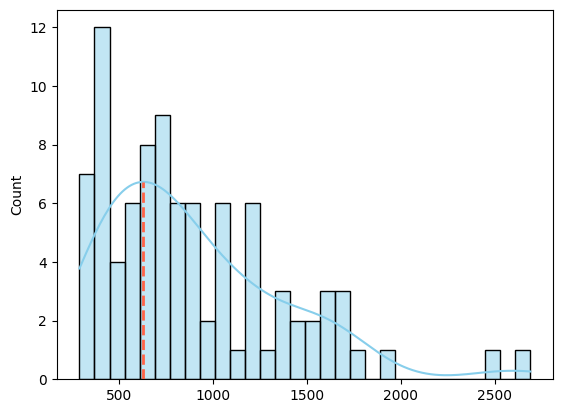

variance with the most frequent repeat is 628.8537688442219


628.8537688442219

In [ ]:
dist_plot(df, 'high_low')

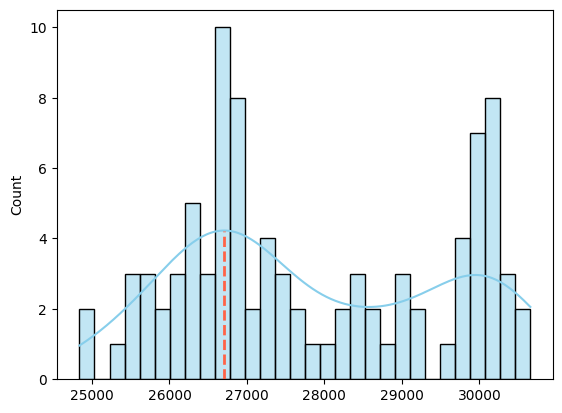

variance with the most frequent repeat is 26709.694472361807


26709.694472361807

In [ ]:
dist_plot(df, 'low')

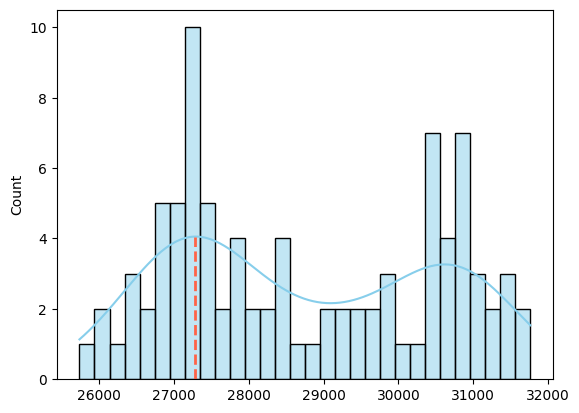

variance with the most frequent repeat is 27278.61256281407


27278.61256281407

In [ ]:
dist_plot(df, 'high')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(['data','grade'], axis=1)
y = df['grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714


## Support Vector Machines (SVM)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6071428571428571


In [ ]:
df.isnull().sum()

data             0
price            0
open             0
high             0
low              0
volume           0
per_change       0
high_low         0
high_previous    0
low_previous     0
true_range       0
grade            0
dtype: int64

In [ ]:
df.columns

Index(['data', 'price', 'open', 'high', 'low', 'volume', 'per_change',
       'high_low', 'high_previous', 'low_previous', 'true_range', 'grade'],
      dtype='object')